In [5]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

data = pd.read_excel('session.xlsx', parse_dates=['SESSION_END', 'SESSION_START'])

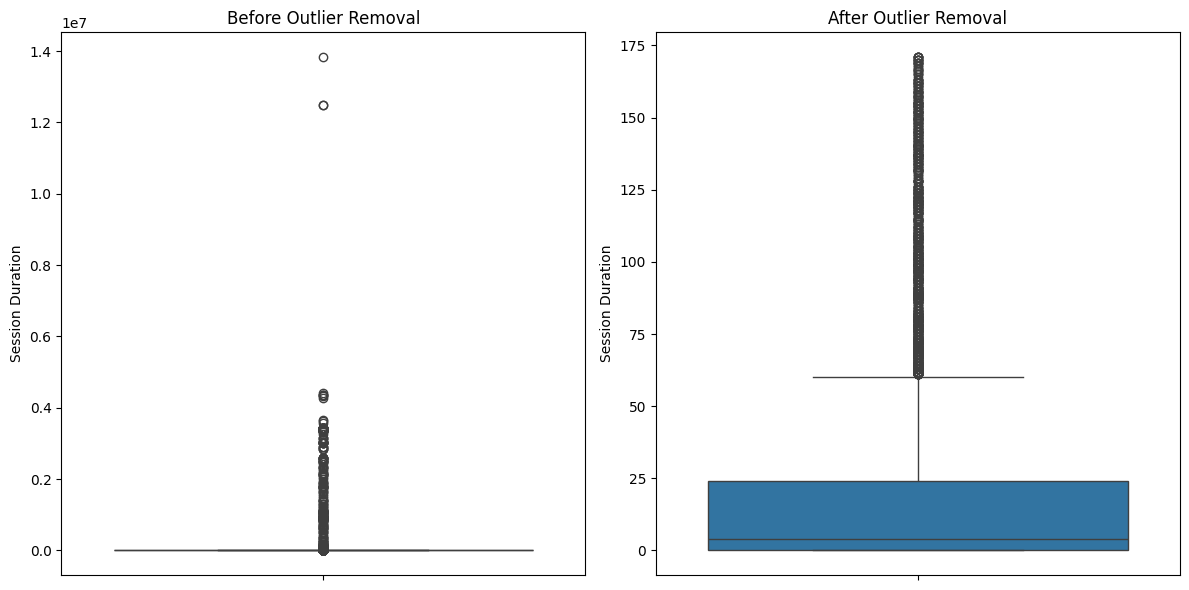

In [6]:
# Remove outliers using the IQR method
Q1 = data['SESSION_DURATION'].quantile(0.25)
Q3 = data['SESSION_DURATION'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_filtered = data[(data['SESSION_DURATION'] >= lower_bound) & (data['SESSION_DURATION'] <= upper_bound)]

# Visualize the data before and after outlier removal
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['SESSION_DURATION'])
plt.title('Before Outlier Removal')
plt.ylabel('Session Duration')

plt.subplot(1, 2, 2)
sns.boxplot(y=data_filtered['SESSION_DURATION'])
plt.title('After Outlier Removal')
plt.ylabel('Session Duration')

plt.tight_layout()
plt.show()

Descriptive Statistics:
count    5624.000000
mean       44.473151
std        66.919723
min         1.000000
25%         4.000000
50%        14.000000
75%        53.000000
max       324.000000
Name: SESSION_DURATION, dtype: float64


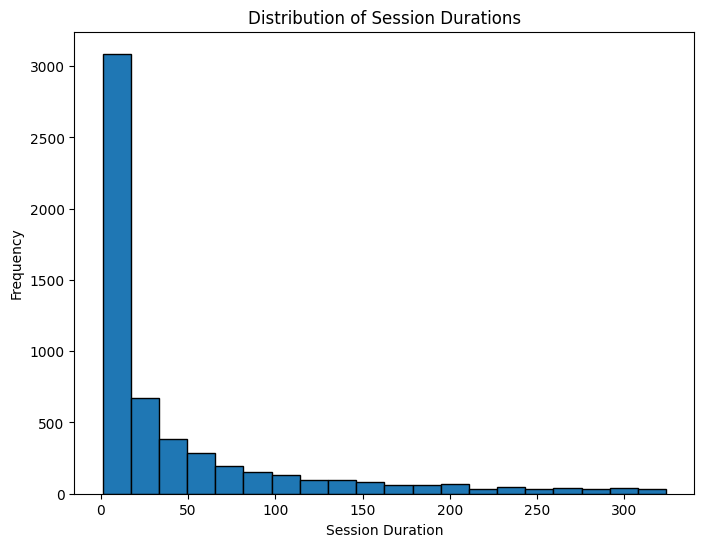

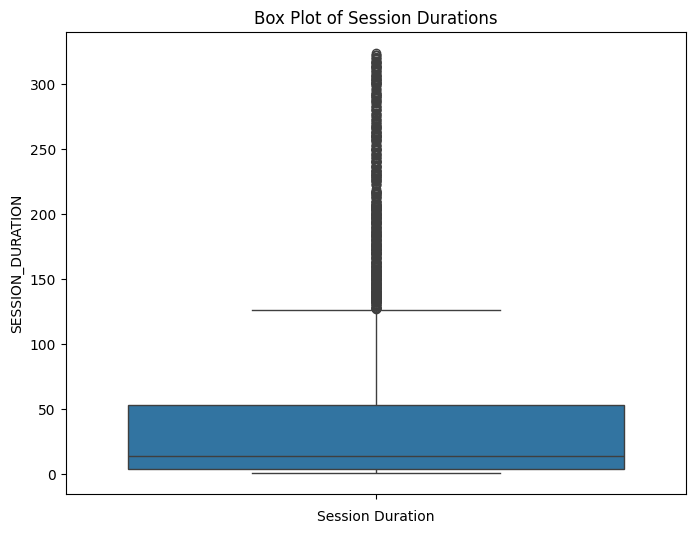


Percentiles:
25th Percentile: 4.0
50th Percentile: 14.0
75th Percentile: 53.0
90th Percentile: 141.0
95th Percentile: 204.0


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('session.xlsx', parse_dates=['SESSION_END', 'SESSION_START'])

# Remove sessions with a duration of 0 seconds
data = data[data['SESSION_DURATION'] > 0]

# Remove outliers using the IQR method
Q1 = data['SESSION_DURATION'].quantile(0.25)
Q3 = data['SESSION_DURATION'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_filtered = data[(data['SESSION_DURATION'] >= lower_bound) & (data['SESSION_DURATION'] <= upper_bound)]

df = data_filtered

# Calculate descriptive statistics
duration_stats = df['SESSION_DURATION'].describe()
print("Descriptive Statistics:")
print(duration_stats)

# Plot a histogram of session durations
plt.figure(figsize=(8, 6))
plt.hist(df['SESSION_DURATION'], bins=20, edgecolor='black')
plt.xlabel('Session Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Session Durations')
plt.show()

# Plot a box plot of session durations
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['SESSION_DURATION'])
plt.xlabel('Session Duration')
plt.title('Box Plot of Session Durations')
plt.show()

# Calculate percentiles
percentiles = [0.25, 0.5, 0.75, 0.9, 0.95]
duration_percentiles = df['SESSION_DURATION'].quantile(percentiles)
print("\nPercentiles:")
for p, d in zip(percentiles, duration_percentiles):
    print(f"{p * 100:.0f}th Percentile: {d}")